<a href="https://colab.research.google.com/github/shengzhehu/Airbnb-Database-Analysis/blob/master/Airbnb_price_prediction_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Three Questions
## 1.What is the top price influencers in the Airbnb dataset?
## 2.Does the date affect prices? How?
## 3.Which is the most popular amenity that customers like?

## Exploratory data analysis

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

In [0]:
downloaded = drive.CreateFile({'id':'1gLUsWqY5TweRWNDz-VhfOmCID5lKn_1m'}) 
downloaded.GetContentFile('listing_full_fixed.csv')

downloaded = drive.CreateFile({'id':'1zaqcrxX1JdTadPXxfOEFdbzFls_PR2V5'}) 
downloaded.GetContentFile('calendar-2017.csv')


In [0]:
listing = pd.read_csv('listing_full_fixed.csv')
calendar = pd.read_csv('calendar-2017.csv')

In [0]:
calendar.head()

,listing_id,date,available,price
0,3109,2018-12-06,t,$52.00
1,3109,2018-12-05,t,$52.00
2,3109,2018-12-04,t,$52.00
3,3109,2018-12-03,t,$52.00
4,3109,2018-12-02,t,$52.00


In [0]:
calendar.shape

(22745705, 4)

In [0]:
calendar.dropna(inplace = True)

In [0]:
calendar.shape

(7265328, 4)

In [0]:
calendar.sample(5)

,listing_id,date,available,price
21644320,21393403,2018-04-09,t,$90.00
1385580,1192253,2018-10-27,t,$40.00
11928970,12806248,2018-06-30,t,$100.00
20229930,20111523,2018-05-07,t,$90.00
3905686,3749606,2018-04-11,t,$87.00


In [0]:
listing.head()

,listing_id,name,host_id,host_name,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,state,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2350957,Attractive studio in Paris 18 th,12004066,Marthe,f,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Paris, ÃŽle-de-France, France",Buttes-Montmartre,ÃŽle-de-France,48.889208,2.363208,Apartment,Entire home/apt,2,1.0,0.0,1.0,Couch,$65.00,$130.00,$30.00,2,$10.00,366,366,2,87.0,f,flexible,f,f,0.04
1,1819895,"Loft, balcony + 180Â° horizon view",7539044,Vinciane,t,"['email', 'phone', 'reviews', 'manual_offline']",t,t,"Paris, ÃŽle-de-France, France",Popincourt,ÃŽle-de-France,48.859113,2.379882,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$150.00,$0.00,$60.00,1,$0.00,365,1125,3,100.0,f,strict_14_with_grace_period,f,f,0.06
2,1206047,Charming apartment in Paris 20,2255607,Baptiste,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, ÃŽle-de-France, France",MÃ©nilmontant,ÃŽle-de-France,48.867448,2.388532,Apartment,Entire home/apt,1,1.0,1.0,3.0,Real Bed,"$1,000.00",$0.00,$300.00,1,$251.00,365,365,0,NaN,f,moderate,f,f,NaN
3,10514687,Champs ElysÃ©es/Ternes/Maillot,54211095,Gerald,f,"['email', 'phone']",t,f,"Paris, ÃŽle-de-France, France",Batignolles-Monceau,ÃŽle-de-France,48.880585,2.292577,Apartment,Entire home/apt,2,0.5,1.0,1.0,Pull-out Sofa,$39.00,$100.00,$15.00,1,$0.00,365,1125,0,NaN,f,strict_14_with_grace_period,f,f,NaN
4,9005605,Appartement ChÃ¢telet-Les Halles,37457136,JÃ©rÃ´me,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, ÃŽle-de-France, France",Louvre,ÃŽle-de-France,48.860000,2.347282,Apartment,Entire home/apt,2,1.0,0.0,1.0,Pull-out Sofa,$77.00,$200.00,$15.00,1,$0.00,365,1125,27,96.0,f,flexible,f,f,0.68


## Data preprocessing

In [0]:
listing_model = listing[['listing_id', 'host_is_superhost','neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds','bed_type',"accommodates","cancellation_policy"]]

In [0]:
listing_model.head()

,listing_id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,cancellation_policy
0,2350957,f,Buttes-Montmartre,Apartment,Entire home/apt,1.0,0.0,1.0,Couch,flexible
1,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period
2,1206047,f,MÃ©nilmontant,Apartment,Entire home/apt,1.0,1.0,3.0,Real Bed,moderate
3,10514687,f,Batignolles-Monceau,Apartment,Entire home/apt,0.5,1.0,1.0,Pull-out Sofa,strict_14_with_grace_period
4,9005605,f,Louvre,Apartment,Entire home/apt,1.0,0.0,1.0,Pull-out Sofa,flexible


In [0]:
# inner join listing and calendar table
join = pd.merge(listing_model,
                calendar,
                 how='inner', on = "listing_id")

In [0]:
join.sample(20)

,listing_id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,accommodates,cancellation_policy,date,available,price
534413,7007537,f,PanthÃ©on,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,4,strict_14_with_grace_period,2018-08-10,t,$99.00
630958,1616439,t,Temple,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,5,strict_14_with_grace_period,2018-02-12,t,$195.00
3169676,17728835,f,Palais-Bourbon,Apartment,Entire home/apt,1.0,2.0,2.0,Real Bed,4,strict_14_with_grace_period,2018-08-31,t,$240.00
2342436,13903014,f,Passy,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,4,strict_14_with_grace_period,2018-09-03,t,$85.00
3353722,14618856,t,Reuilly,Bed and breakfast,Private room,1.0,1.0,1.0,Real Bed,2,flexible,2018-09-21,t,$110.00
2517515,823177,f,Buttes-Chaumont,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,6,strict_14_with_grace_period,2018-01-18,t,$55.00
570402,11931352,f,Batignolles-Monceau,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,2,flexible,2018-06-12,t,$53.00
842061,943903,f,EntrepÃ´t,Apartment,Entire home/apt,1.0,2.0,2.0,Real Bed,3,flexible,2018-02-12,t,$85.00
2428007,21876010,f,Popincourt,Serviced apartment,Entire home/apt,2.0,2.0,5.0,Real Bed,7,strict_14_with_grace_period,2018-06-27,t,$180.00
853102,1873150,f,Buttes-Montmartre,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,2,moderate,2018-05-13,t,$75.00


In [0]:
join.dropna(inplace = True)

In [0]:
join.shape

(3378389, 14)

In [0]:
join['date'] = pd.to_datetime(join['date'])

In [0]:
# create a weekday feature
join['weekday'] = [x.weekday() for x in join['date']]


In [0]:
# convert the weekday feature to boolean
 join['weekday'] = [0 if x in [4, 5] else 1 for x in join['weekday']]

In [0]:
join.head(20)

,listing_id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,cancellation_policy,date,available,price,weekday
0,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-24,t,$150.00,1
1,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-23,t,$150.00,1
2,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-22,t,$150.00,0
3,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-21,t,$150.00,0
4,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-20,t,$150.00,1
5,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-19,t,$150.00,1
6,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-18,t,$150.00,1
7,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-17,t,$150.00,1
8,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-16,t,$150.00,1
9,1819895,t,Popincourt,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,strict_14_with_grace_period,2018-09-15,t,$150.00,0


In [0]:
join.dropna(inplace = True)

In [0]:
join.shape

(3378389, 15)

In [0]:
join['price'] = [float(i[1:]) if ',' not in i else float(''.join(i[1:].split(','))) for i in join['price']]

In [0]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378389 entries, 0 to 3394385
Data columns (total 16 columns):
listing_id                int64
host_is_superhost         object
neighbourhood_cleansed    object
property_type             object
room_type                 object
accommodates              int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                  object
instant_bookable          object
cancellation_policy       object
date                      datetime64[ns]
available                 object
price                     float64
weekday                   int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 438.2+ MB


## Data Modeling

In [0]:
#listing['price'] = [float(i[1:]) if ',' not in i else float(''.join(i[1:].split(','))) for i in listing['price']]

In [0]:
#listing_model.info()

In [0]:
#listing.dropna(inplace=True)

In [0]:
X = join[[ 'neighbourhood_cleansed', 'room_type', 'bathrooms', 'bedrooms', 'beds']]

In [0]:
y = join[['price']]

In [0]:
#from sklearn import preprocessing
#enc = preprocessing.OneHotEncoder()
#enc.fit(join['room_type'].reshape(-1,1))

In [0]:
X = pd.get_dummies(X, drop_first = True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(random_state = 42)
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

In [0]:
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 2)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#pprint(random_grid)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [0]:
#rf_random.predict(X_test)
#rf_random.score(X_test, y_test)

0.5632987844364247

In [0]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF.predict(X_test)
RF.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.29370832744912345

In [0]:
#sns.lmplot(x='bathrooms', y='price', data=join)
#plt.show()

In [0]:
#sns.lmplot(x='accommodates', y='price', data=join)
#plt.show()


In [0]:
#sns.lmplot(x='cancellation_policy', y='price', data=join)
#plt.show()



In [0]:
#print(RF.feature_importances_)

[4.05851221e-02 1.01593493e-04 3.13036146e-01 5.63673799e-06
 6.01201304e-02 1.53549315e-06 3.60814663e-05 1.76975639e-06
 1.05575232e-01 6.06283379e-07 2.79694613e-06 2.54364919e-06
 4.73602788e-06 1.18626908e-06 7.83307412e-06 8.79760329e-07
 1.64657493e-05 1.44522043e-06 3.68204367e-06 1.32392615e-06
 5.97006283e-07 2.63505359e-06 2.73587139e-05 7.95593607e-06
 4.01469403e-02 4.51860450e-07 3.84795660e-08 3.83401561e-06
 1.11611960e-11 6.37924726e-07 9.13536009e-09 9.36039653e-11
 4.11852521e-07 4.69712466e-08 3.74114772e-10 1.00483451e-07
 2.75427293e-06 8.78203333e-08 4.60773597e-06 1.66304599e-09
 3.51670480e-07 1.10920256e-12 3.51693208e-02 5.21623635e-09
 3.28342536e-11 9.45893664e-07 3.63798994e-08 2.26698327e-08
 1.64505777e-04 5.96073087e-03 4.21131135e-08 2.54888291e-08
 3.78970127e-07 3.33183757e-01 6.58146611e-02]


In [0]:
importances =RF.feature_importances_

In [0]:
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
beds: 0.5955
neighbourhood_cleansed_EntrepÃ´t: 0.2981
bathrooms: 0.0886
room_type_Shared room: 0.0169
room_type_Private room: 0.0005
bedrooms: 0.0002
neighbourhood_cleansed_Vaugirard: 0.0001
neighbourhood_cleansed_Ã‰lysÃ©e: 0.0
neighbourhood_cleansed_Temple: 0.0
neighbourhood_cleansed_Reuilly: 0.0
neighbourhood_cleansed_Popincourt: 0.0
neighbourhood_cleansed_Passy: 0.0
neighbourhood_cleansed_PanthÃ©on: 0.0
neighbourhood_cleansed_Palais-Bourbon: 0.0
neighbourhood_cleansed_OpÃ©ra: 0.0
neighbourhood_cleansed_Observatoire: 0.0
neighbourhood_cleansed_MÃ©nilmontant: 0.0
neighbourhood_cleansed_Luxembourg: 0.0
neighbourhood_cleansed_Louvre: 0.0
neighbourhood_cleansed_HÃ´tel-de-Ville: 0.0
neighbourhood_cleansed_Gobelins: 0.0
neighbourhood_cleansed_Buttes-Montmartre: 0.0
neighbourhood_cleansed_Buttes-Chaumont: 0.0
neighbourhood_cleansed_Bourse: 0.0


In [0]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices]
values = importances[indices]

dict = {}
for i in range(len(columns)):
  dict[columns[i]] = values[i]

property_type = 0
#host_is_superhost = 0
bed_type = 0
room_type = 0
#cancellation_policy = 0
neighbourhood_cleansed = 0

for i in dict:
#  if 'property_type' in i:
#    property_type += dict[i]
#  elif 'host_is_superhost' in i:
#    host_is_superhost += dict[i]
#  elif 'bed_type' in i:
#    bed_type += dict[i]
  if 'room_type' in i:
    room_type += dict[i]
#  elif 'cancellation_policy' in i:
#    cancellation_policy += dict[i]
  elif 'neighbourhood_cleansed' in i:
    neighbourhood_cleansed += dict[i]

    
#dict['property_type'] = property_type
#dict['host_is_superhost'] = host_is_superhost
#dict['bed_type'] = bed_type
dict['room_type'] = room_type
#dict['cancellation_policy'] = cancellation_policy
dict['neighbourhood_cleansed'] = neighbourhood_cleansed
new_columns = ['bathrooms', 'beds','bedrooms']
new_values = [dict['bathrooms'],dict['beds'],dict['bedrooms']]


new_columns = new_columns + ['room_type','neighbourhood_cleansed']
new_values = new_values + [dict['room_type'],dict['neighbourhood_cleansed']]

## Evaluate the Results

In [0]:
new_columns

['bathrooms', 'beds', 'bedrooms', 'room_type', 'neighbourhood_cleansed']

In [0]:
new_dict = {}
for i in range(len(new_columns)):
  new_dict[new_columns[i]] = new_values[i]

new_dict = sorted(new_dict.items(),key = lambda k:k[1],reverse=True)
print(new_dict)

[('beds', 0.5954798530249183), ('neighbourhood_cleansed', 0.29836816308123065), ('bathrooms', 0.08862066113397947), ('room_type', 0.017371323476213438), ('bedrooms', 0.0001599992836581765)]


In [0]:
new_df = pd.DataFrame()
a,b = [],[]
for i in new_dict:
  a.append(i[0])
  b.append(i[1])
new_df['Feature'] = a
new_df['Weight'] = b
new_df.head(10)

,Feature,Weight
0,beds,0.595480
1,neighbourhood_cleansed,0.298368
2,bathrooms,0.088621
3,room_type,0.017371
4,bedrooms,0.000160


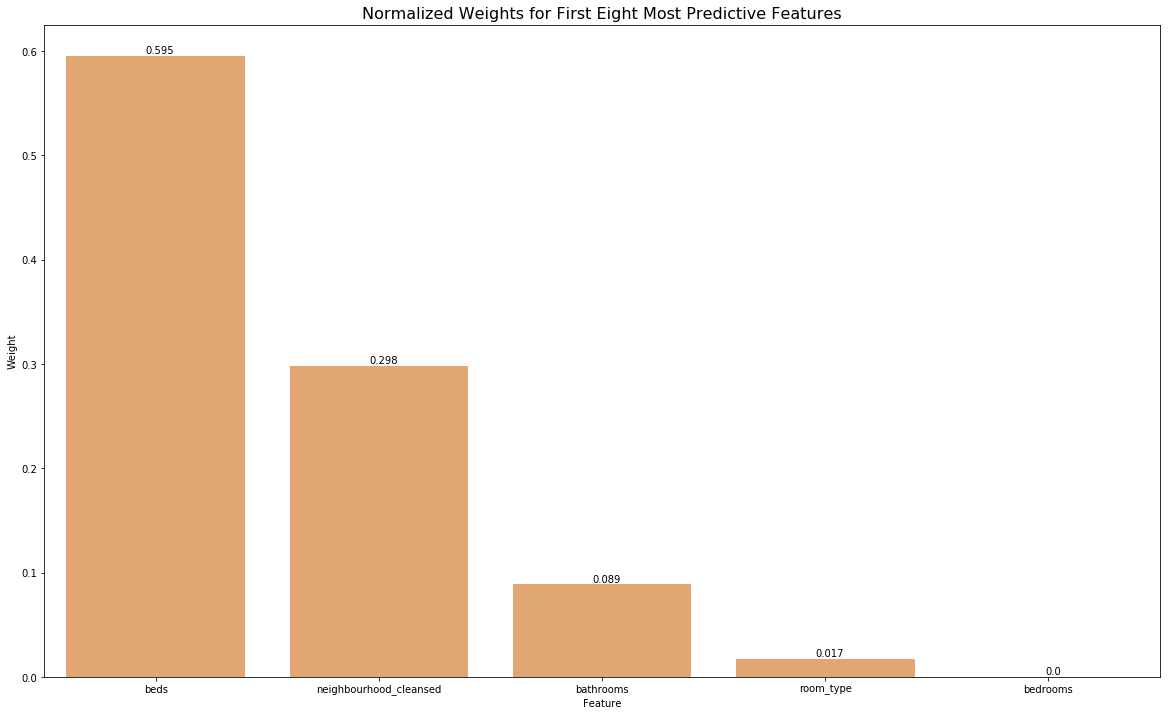

In [0]:
import seaborn as sns
import matplotlib.pyplot as pl
#fig = pl.figure(figsize = (20,5))
fig, ax = pl.subplots(figsize=(20,12))
ax = fig.gca()
sns.barplot(x='Feature',y='Weight',data=new_df,color='sandybrown')
pl.title("Normalized Weights for First Eight Most Predictive Features", fontsize = 16)


labels = [round(i,3) for i in new_df['Weight']]
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x()-0.38 + rect.get_width(), height, label,
            ha='center', va='bottom')

In [0]:
sns.distplot(join['beds'])

In [0]:
import matplotlib.pyplot as pl

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = pl.figure(figsize = (20,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(10), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

In [0]:
#feature_plot(importances,X_train, y_train)

In [0]:
# from google.colab import files
# join.to_csv('join.csv', index = False)
# files.download('join.csv')

In [0]:
join_corr = join.drop(columns = 'listing_id')

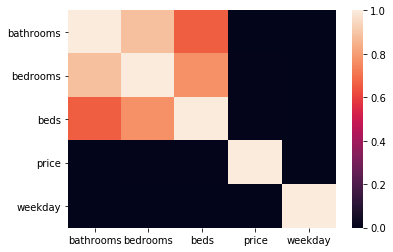

In [0]:
# calculate the correlation matrix
corr = join_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

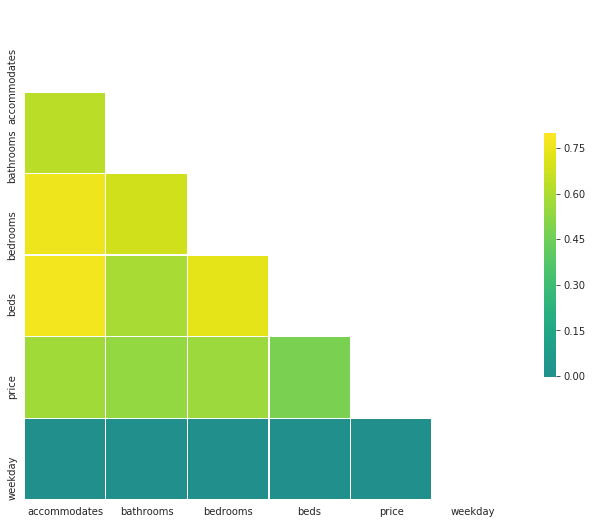

In [0]:


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Table")\
    .set_precision(2)\
    .set_table_styles(magnify())

,accommodates,bathrooms,bedrooms,beds,price,weekday
accommodates,1,0.63,0.76,0.77,0.57,-0.0019
bathrooms,0.63,1,0.68,0.59,0.54,-0.0022
bedrooms,0.76,0.68,1,0.73,0.56,-0.0042
beds,0.77,0.59,0.73,1,0.48,-0.0048
price,0.57,0.54,0.56,0.48,1,-0.0033
weekday,-0.0019,-0.0022,-0.0042,-0.0048,-0.0033,1


In [0]:


host_price = join.groupby(['listing_id','weekday'])['price'].mean().reset_index()
host_price_even = host_price.iloc[::2].reset_index(drop=True)
host_price_odd = host_price.iloc[1::2].reset_index(drop=True)
price_diff = host_price_even['price'] - host_price_odd['price']
host_price_even.drop(price_diff[price_diff == 0].index, inplace=True)
print(len(host_price_even))
print(host_price_even)

#weekday_price = join.groupby(['weekday'])['price'].mean()
#weekday_price

572
     listing_id  weekday       price
0         26567        0   49.483871
2         77482        0  562.878049
5        118731        0   48.407407
6        131487        0  116.145833
9        222369        0  109.479167
10       279246        0  100.684211
14       380500        0   70.544118
15       432537        0  374.000000
18       483819        0   67.500000
19       503231        0  102.635294
20       526719        0  104.756757
21       557246        0  324.787234
22       561155        0   49.333333
23       593465        0  124.729167
25       682531        0   57.064516
26       689956        0   71.428571
28       704672        0  172.392157
29       706690        0   87.500000
35       833988        0   83.000000
37       882844        0   72.166667
39       897778        0  138.375000
40      1041958        0  171.896552
42      1137130        0   72.058824
44      1169377        0   95.000000
49      1237967        0   31.571429
53      1285350        0   80.5700